**Learn Machine Learning by Projects** : Based on ML Bookcamp 

[The book](https://www.manning.com/books/machine-learning-bookcamp?a_aid=AGMLBookcamp&a_bid=2eb9ca01) , [Original Repo]( https://github.com/alexeygrigorev/mlbookcamp-code )

<img src="https://images.manning.com/360/480/resize/book/d/f91ead8-e9eb-412e-8f75-5f2d7f588e67/Grigorev-MLB-HI.png" width="200">


# Business Understanding

*__Churn Prediction__*

```identifying customers who are likely to cancel their contracts soon.```

* If the company can do that, it can handle users before churn
* The target variable that we want to predict is categorical and has only two possible outcomes:
churn or not churn (Binary Classification).
* We also would like to understand why the model thinks our customers
churn, and for that, we need to be able to interpret the model’s predictions.

* We will use data from https://www.kaggle.com/blastchar/telco-customer-churn.

* According to the description, this dataset has the following information:
    * __Services of the customers__: phone; multiple lines; internet; tech support and extra services such as online security, backup, device protection, and TV streaming
    * __Account information__: how long they have been clients, type of contract, type of
payment method
    * __Charges__: how much the client was charged in the past month and in total
    * __Demographic information__: gender, age, and whether they have dependents or a partner
    * __Churn__: yes/no, whether the customer left the company within the past month

# Initial Data Preparation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Customer ID

In [6]:
df.drop('customerID', axis=1, inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


## Total Charges

In [7]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [8]:
df[df['TotalCharges']==' '].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [9]:
len(df[df['TotalCharges']==' '])

11

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
len(df[df['TotalCharges']==' '])

0

In [12]:
df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## Missing Values

In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Some Cleaning

In [17]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [18]:
df.churn = (df.churn == 'Yes').astype(int)

In [19]:
df.churn.value_counts()  #imbalance

0    5174
1    1869
Name: churn, dtype: int64

In [20]:
df.churn.value_counts(normalize= True)

0    0.73463
1    0.26537
Name: churn, dtype: float64

In [21]:
df.churn.mean()

0.2653698707936959

# EDA

In [22]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [23]:
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance
``` It’s often done as a part of exploratory data analysis to figure out which variables will be useful for the model.```
 
```It also gives us additional insights about the dataset and helps answer questions like “What makes customers churn?” and “What are the characteristics of people who churn?”```

### Risk Ratio
> risk = group rate / global rate

* ` a group with a risk close to 1 is not risky at all`
* ` a group with a risk lower than 1:, the clients in this group are less likely to churn than clients in general`
* ` a group with a risk higher than 1: there’s more churn in the group than in the population, `

In [24]:
global_mean = df.churn.mean()
round(global_mean, 2)

0.27

In [25]:
churn_gender = df.groupby('gender').churn.mean()
churn_gender  # we can compare it with the global churn rate

gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64

> the difference between the rates is small, the value is not important when predicting churn because this group of customers is not really different from the rest of the customers. 

In [26]:
churn_partner = df.groupby('partner').churn.mean()
churn_partner

partner
No     0.329580
Yes    0.196649
Name: churn, dtype: float64

> the difference is not small, something inside that group sets it apart from the rest. A machine learning algorithm should be able to pick this up and use it when making predictions.

In [27]:
gender_risk = churn_gender / global_mean
gender_risk

gender
Female    1.014466
Male      0.985807
Name: churn, dtype: float64

In [28]:
partner_risk = churn_partner / global_mean
partner_risk

partner
No     1.241964
Yes    0.741038
Name: churn, dtype: float64

In [29]:
from IPython.display import display
for feature in categorical:                                           
    df_group = df.groupby(by=feature).churn.agg(['mean']) 
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
Female,0.269209,0.003839,1.014466
Male,0.261603,-0.003766,0.985807


,mean,diff,risk
seniorcitizen,,,
0,0.236062,-0.029308,0.889557
1,0.416813,0.151443,1.570686


,mean,diff,risk
partner,,,
No,0.329580,0.064210,1.241964
Yes,0.196649,-0.068721,0.741038


,mean,diff,risk
dependents,,,
No,0.312791,0.047422,1.178700
Yes,0.154502,-0.110868,0.582215


,mean,diff,risk
phoneservice,,,
No,0.249267,-0.016103,0.939319
Yes,0.267096,0.001726,1.006506


,mean,diff,risk
multiplelines,,,
No,0.250442,-0.014927,0.943749
No phone service,0.249267,-0.016103,0.939319
Yes,0.286099,0.020729,1.078114


,mean,diff,risk
internetservice,,,
DSL,0.189591,-0.075779,0.714441
Fiber optic,0.418928,0.153558,1.578656
No,0.074050,-0.191320,0.279044


,mean,diff,risk
onlinesecurity,,,
No,0.417667,0.152297,1.573906
No internet service,0.074050,-0.191320,0.279044
Yes,0.146112,-0.119258,0.550597


,mean,diff,risk
onlinebackup,,,
No,0.399288,0.133918,1.504645
No internet service,0.074050,-0.191320,0.279044
Yes,0.215315,-0.050055,0.811377


,mean,diff,risk
deviceprotection,,,
No,0.391276,0.125906,1.474456
No internet service,0.074050,-0.191320,0.279044
Yes,0.225021,-0.040349,0.847951


,mean,diff,risk
techsupport,,,
No,0.416355,0.150985,1.568960
No internet service,0.074050,-0.191320,0.279044
Yes,0.151663,-0.113706,0.571517


,mean,diff,risk
streamingtv,,,
No,0.335231,0.069861,1.263261
No internet service,0.074050,-0.191320,0.279044
Yes,0.300702,0.035332,1.133143


,mean,diff,risk
streamingmovies,,,
No,0.336804,0.071434,1.269188
No internet service,0.074050,-0.191320,0.279044
Yes,0.299414,0.034044,1.128291


,mean,diff,risk
contract,,,
Month-to-month,0.427097,0.161727,1.609440
One year,0.112695,-0.152675,0.424672
Two year,0.028319,-0.237051,0.106714


,mean,diff,risk
paperlessbilling,,,
No,0.163301,-0.102069,0.615371
Yes,0.335651,0.070281,1.264842


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.167098,-0.098271,0.629681
Credit card (automatic),0.152431,-0.112939,0.574410
Electronic check,0.452854,0.187484,1.706502
Mailed check,0.191067,-0.074303,0.720003


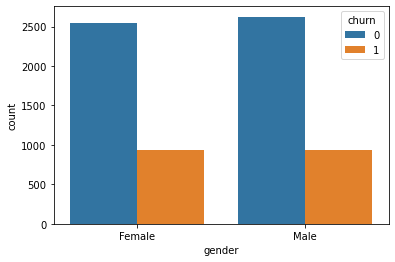

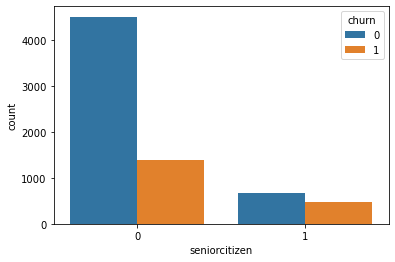

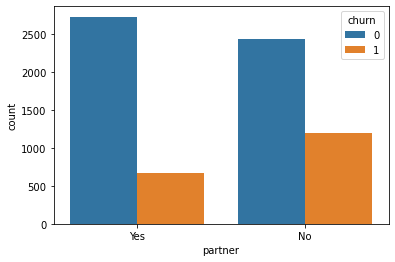

In [30]:
for feature in categorical[:3]:                                           
    _=sns.countplot(x= feature, hue = 'churn', data=df)
    plt.show()

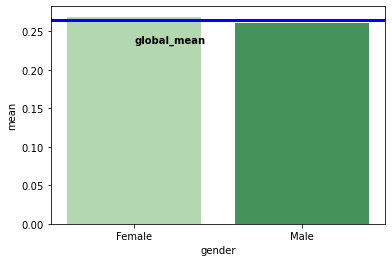

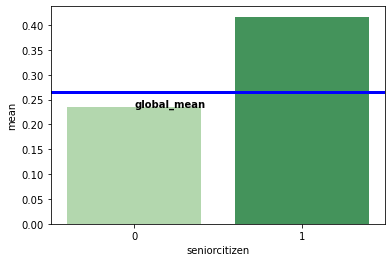

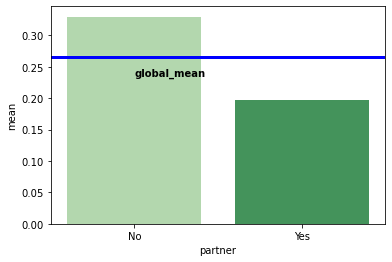

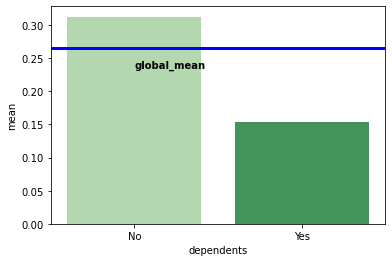

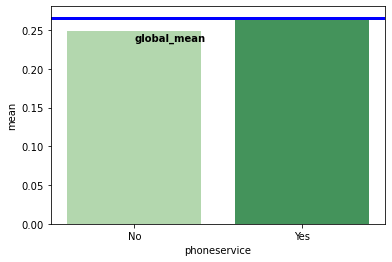

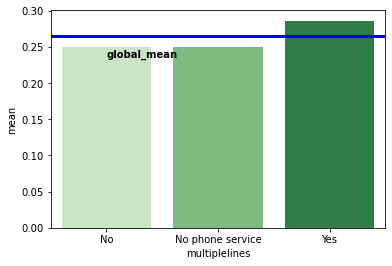

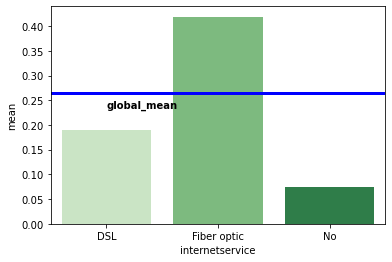

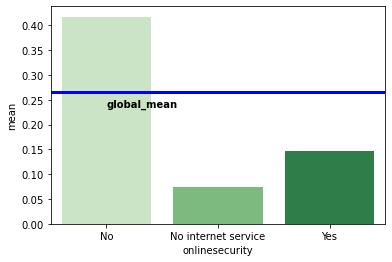

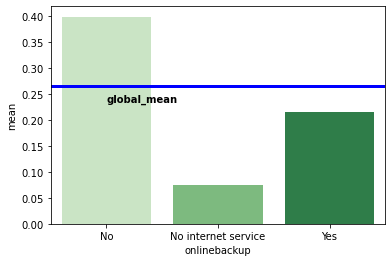

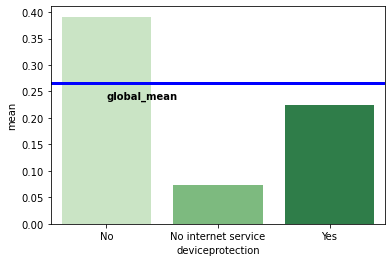

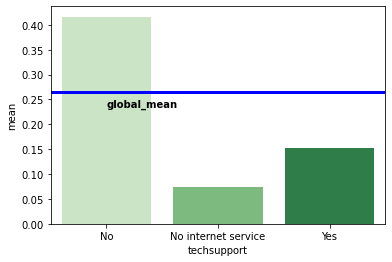

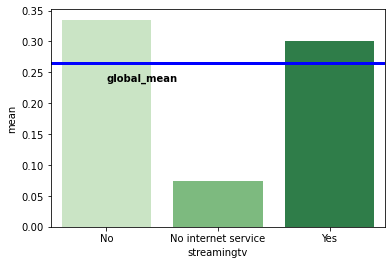

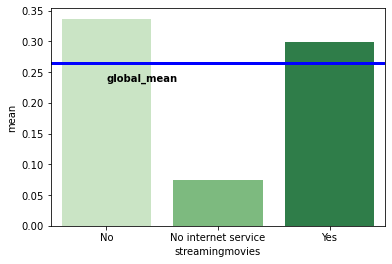

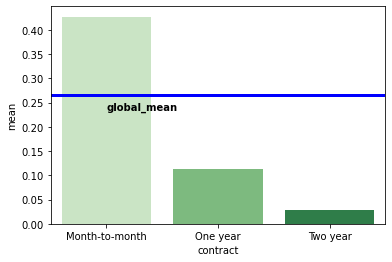

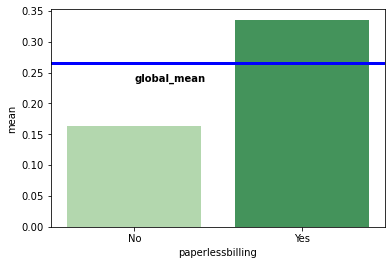

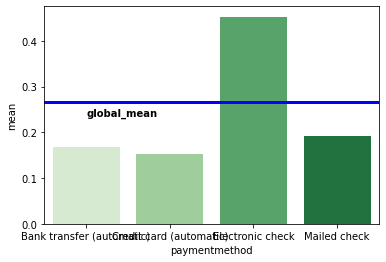

In [31]:
for feature in categorical:                                           
    df_group = df.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()

> ### Some Insights
* `For gender, there is not much difference between females and males.`

* Senior citizens tend to churn more than nonseniors.

* `People with a partner churn less than people with no partner.`

* People who use phone service are not at risk of churning. People who don’t use phone service are even less likely to churn.

* `Clients with no tech support tend to churn more than those who do.`

* People with monthly contracts cancel the contract a lot more often than others, and people with two-year contacts churn very rarely.

### Mutual Information
* More efficient to compare features importance
* Mutual information is a way to quantify the degree of dependency between two categorical variables, but it doesn’t work when one of the features is numerical

In [32]:
from sklearn.metrics import mutual_info_score
 
def calculate_mi(series):                                      
    return mutual_info_score(series, df.churn)      
 
df_mi = df[categorical].apply(calculate_mi)         
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI') 
df_mi

,MI
contract,0.098453
onlinesecurity,0.064677
techsupport,0.063021
internetservice,0.055574
onlinebackup,0.046792
paymentmethod,0.044519
deviceprotection,0.043917
streamingmovies,0.032001
streamingtv,0.031908
paperlessbilling,0.019194


* `Higher values of mutual information mean a higher degree of dependence: if the mutual information between a categorical variable and the target is high, this categorical variable will be quite useful for predicting the target.` 

* `On the other hand, if the mutual information is low, the categorical variable and the target are independent, and thus the variable will not be useful for predicting the target.`

### Correlation Coefficient
* The correlation coefficient (Pearson’s correlation coefficient). It is a value from –1 to 1
* Positive correlation means that when one variable goes up, the other variable tends to go up as well `(In the case of a binary target, when the values of the variable are high, we see ones more often than zeros. But when the values of the variable are low, zeros become more frequent than ones.)`
* Zero correlation means no relationship between two variables: they are completely independent.
* Negative correlation occurs when one variable goes up and the other goes down. `(In the binary case, if the values are high, we see more zeros than ones in the target variable. When the values are low, we see more ones.)`

In [33]:
df[numerical].corrwith(df.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.199037
dtype: float64

#### Tenure
> The correlation between `tenure` and `churn` is –0.35: it has a negative sign, so the longer customers stay, the less often they tend to churn

In [34]:
t1 =df[df['tenure'] <= 2].churn.mean()
t1

0.5835266821345708

In [35]:
t2 = df[(df.tenure >= 3) & (df.tenure <= 12)].churn.mean()
t2 

0.4033232628398791

In [36]:
t3 = df[df['tenure'] >= 12].churn.mean()
t3

0.17490952955367914

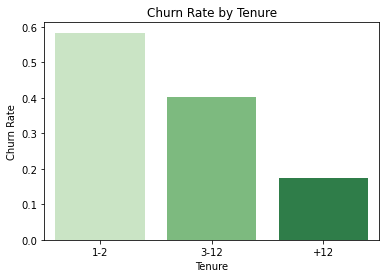

In [37]:
sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');
plt.title('Churn Rate by Tenure');
plt.xlabel('Tenure');
plt.ylabel('Churn Rate');

#### Monthly Charges
> `monthlycharges` has a positive coefficient of 0.19, which means that customers who pay more tend to leave more often. 

In [38]:
mc1 =df[df['monthlycharges'] <= 20].churn.mean()
mc1

0.08841463414634146

In [39]:
mc2 = df[(df.monthlycharges >= 21) & (df.monthlycharges <= 50)].churn.mean()
mc2

0.22807017543859648

In [40]:
mc3 = df[df['monthlycharges'] > 50].churn.mean()
mc3

0.3178752107925801

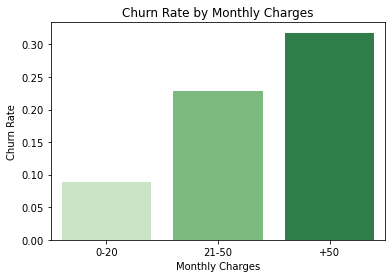

In [41]:
sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');
plt.title('Churn Rate by Monthly Charges');
plt.xlabel('Monthly Charges');
plt.ylabel('Churn Rate');

#### Total Charges
> `totalcharges` has a negative correlation, which makes sense: the longer people stay with the company, the more they have paid in total, so it’s less likely that they will leave.

In [42]:
tc1 = df[df['totalcharges'] <= 1000].churn.mean()
tc1

0.36985827860352577

In [43]:
tc2 = df[(df.totalcharges > 1000) & (df.totalcharges <= 5000)].churn.mean()
tc2

0.21293532338308457

In [44]:
tc3 = df[df['totalcharges'] > 5000].churn.mean()
tc3

0.13832599118942732

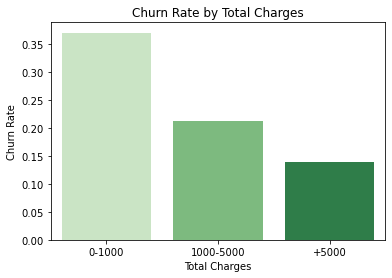

In [45]:
sns.barplot(x =['0-1000', '1000-5000', '+5000'], y =[tc1,tc2,tc3], palette='Greens');
plt.title('Churn Rate by Total Charges');
plt.xlabel('Total Charges');
plt.ylabel('Churn Rate');

# Handling Categorical Variables
> ### `one-hot encoding`

In [46]:
df_enc= pd.get_dummies(df, drop_first=True)
df_enc.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                     verbose_feature_names_out=False)

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df

,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,...,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure,monthlycharges,totalcharges,churn
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,34.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2.0,53.85,108.15,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.75,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,24.0,84.80,1990.50,0.0
7039,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,72.0,103.20,7362.90,0.0
7040,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,11.0,29.60,346.45,0.0
7041,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,4.0,74.40,306.60,1.0


# Data Splitting 

In [48]:
# Features
X = df_enc.drop('churn', axis=1)
# Target
y = df_enc['churn']

In [49]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)
print("Training Data Size: ", len(y_train))
print("Validation Data Size: ", len(y_valid))
print("Testing Data Size: ", len(y_test))

Training Data Size:  4507
Validation Data Size:  1127
Testing Data Size:  1409


# Modelling
* We will use logistic regression as a classification model


 ## Logistic Regression in breif


* Logistic regression is a linear model, but unlike linear regression, it’s a classification model
* The output of logistic regression is probability; the probability that the observation is positive, or, in other words, the probability that y = 1. `For our case, it’s the probability that the customer will churn.`
* To be able to treat the output as a probability, we need to make sure that the predictions of the model always stay between zero and one. We use a special mathematical function for this purpose called `sigmoid`, and the full formula for the logistic regression model is:

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781617296819/files/OEBPS/Images/03_23-Equation_3-3.png)

* The sigmoid function maps any value to a number between zero and one. It’s defined this way:

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781617296819/files/OEBPS/Images/03_24.png)

 ### Linear Regression vs. Logistic Regression

```
def linear_regression(xi):
    result = bias
    for j in range(n):
        result = result + xi[j] * w[j]
    return result
```
******

```
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
    prob = sigmoid(score)
    return prob
```  

```
import math
def sigmoid(score):
    return 1 / (1 + math.exp(-score))
```

## Applying Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [51]:
y_val_pred = model.predict_proba(X_valid)
y_val_pred

array([[0.99278148, 0.00721852],
       [0.79865911, 0.20134089],
       [0.78563958, 0.21436042],
       ...,
       [0.96347212, 0.03652788],
       [0.41995986, 0.58004014],
       [0.7071521 , 0.2928479 ]])

In [52]:
y_test_pred = model.predict_proba(X_test)
y_test_pred

array([[0.94668745, 0.05331255],
       [0.90123818, 0.09876182],
       [0.67535079, 0.32464921],
       ...,
       [0.99405064, 0.00594936],
       [0.80732754, 0.19267246],
       [0.39850961, 0.60149039]])

In [53]:
y_test_pred[:,1]

array([0.05331255, 0.09876182, 0.32464921, ..., 0.00594936, 0.19267246,
       0.60149039])

> This output (probabilities) is often called `soft predictions`. These tell us the probability of churning as a number between zero and one. It’s up to us to decide how to interpret this number and how to use it.

> To get the binary predictions, `hard predictions`, we take the probabilities and cut them above a certain threshold

In [54]:
y_test_pred[:,1] > 0.5

array([False, False, False, ..., False, False,  True])

In [55]:
y_test_pred = (y_test_pred[:,1] > 0.5).astype(int)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [56]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [57]:
y_test_pred == y_test

3381     True
6180     True
4829     True
3737    False
4249     True
        ...  
2563     True
2028     True
2899     True
3474     True
5154     True
Name: churn, Length: 1409, dtype: bool

In [58]:
(y_test_pred == y_test).mean()

0.8090844570617459

In [59]:
print('LogisticRegression Training Accuracy: ', round(model.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.8
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.81


## Model Interpretition

In [60]:
w0= model.intercept_[0]
w0

-0.169935471328192

In [61]:
w_matrix = model.coef_[0]
w_matrix.round(2)

array([ 0.15, -0.07,  0.  ,  0.  , -0.03,  0.06, -0.08, -0.5 ,  0.33,
        0.23,  0.68, -0.09, -0.09, -0.45, -0.09, -0.13, -0.09, -0.14,
       -0.09, -0.41, -0.09,  0.06, -0.09,  0.15, -0.64, -1.23,  0.32,
        0.04,  0.24,  0.04])

In [62]:
w_matrix.shape

(30,)

In [63]:
X.shape

(7043, 30)

In [64]:
X.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phoneservice_Yes',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_Fiber optic', 'internetservice_No',
       'onlinesecurity_No internet service', 'onlinesecurity_Yes',
       'onlinebackup_No internet service', 'onlinebackup_Yes',
       'deviceprotection_No internet service', 'deviceprotection_Yes',
       'techsupport_No internet service', 'techsupport_Yes',
       'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No internet service', 'streamingmovies_Yes',
       'contract_One year', 'contract_Two year', 'paperlessbilling_Yes',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

In [65]:
dict(zip(X.columns, w_matrix.round(2)))

{'seniorcitizen': 0.15,
 'tenure': -0.07,
 'monthlycharges': 0.0,
 'totalcharges': 0.0,
 'gender_Male': -0.03,
 'partner_Yes': 0.06,
 'dependents_Yes': -0.08,
 'phoneservice_Yes': -0.5,
 'multiplelines_No phone service': 0.33,
 'multiplelines_Yes': 0.23,
 'internetservice_Fiber optic': 0.68,
 'internetservice_No': -0.09,
 'onlinesecurity_No internet service': -0.09,
 'onlinesecurity_Yes': -0.45,
 'onlinebackup_No internet service': -0.09,
 'onlinebackup_Yes': -0.13,
 'deviceprotection_No internet service': -0.09,
 'deviceprotection_Yes': -0.14,
 'techsupport_No internet service': -0.09,
 'techsupport_Yes': -0.41,
 'streamingtv_No internet service': -0.09,
 'streamingtv_Yes': 0.06,
 'streamingmovies_No internet service': -0.09,
 'streamingmovies_Yes': 0.15,
 'contract_One year': -0.64,
 'contract_Two year': -1.23,
 'paperlessbilling_Yes': 0.32,
 'paymentmethod_Credit card (automatic)': 0.04,
 'paymentmethod_Electronic check': 0.24,
 'paymentmethod_Mailed check': 0.04}